# Download Dataset

https://data.cityofnewyork.us/City-Government/BUILDING/5zhs-2jue

In [2]:
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import pandas as pd
from tqdm import tqdm # for a long for loop
import imageio.v2 as imageio # to build gif

In [3]:
import osmnx as ox

<Axes: >

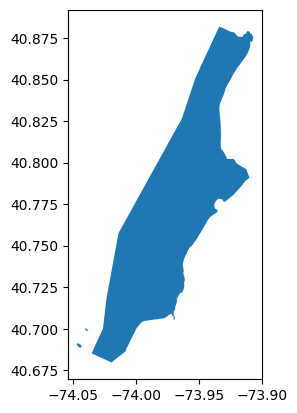

In [5]:
ox.geocode_to_gdf('Manhattan').plot()

In [ ]:
gdf_admin = gpd.read_file('manhattan_admin.geojson')
gdf_build = gpd.read_file().to_crs(4326)

In [ ]:
gdf_build = gpd.overlay(gdf_build, gdf_admin)
gdf_build = gdf_build[['geometry', 'construction_year']]
gdf_build = gdf_build.dropna(subset=['geometry', 'construction_year'])
gdf_build['construction_year'] = gdf_build['construction_year'].astype(int)
len(gdf_build)

In [ ]:
folderout = 'frames'
os.makedirs(folderout, exist_ok=True)

In [ ]:
limit_year = 1900

before = gdf_build[gdf_build['construction_year'] <= limit_year]
after = gdf_build[gdf_build['construction_year'] > limit_year]

fig, ax = plt.subplots(1,1, figsize=(8,12))
ax.set_facecolor('black')

after.plot(ax=ax, color='dimgray', linewidth=0, alpha=0.5)
before.plot(ax=ax, color='crimson', linewidth=0)

ax.text(
    0.85, 0.02, str(limit_year),
    transform=ax.transAxes,
    fontsize=40, fontweight='bold',
    color='white', ha='center', va='bottom'
)

#ax.axis('off')
ax.set_xlim([-74.039, -73.96])
ax.set_ylim([40.68, 40.775])

plt.tight_layout()
plt.show()

In [ ]:
# all buildings colored in red built until 1900

# Loop over every Year 1800-2025

In [ ]:
for limit_year in tqdm(range(1800, 2025)):
    if not os.path.exists(folderout + '/buildings_' + str(limit_year) + '.png'):
        fig, ax = plt.subplots(1,1, figsize=(8,12))
        ax.set_facecolor('black')
        
        after.plot(ax=ax, color='dimgray', linewidth=0, alpha=0.5)
        before.plot(ax=ax, color='crimson', linewidth=0)
        
        ax.text(
            0.85, 0.02, str(limit_year),
            transform=ax.transAxes,
            fontsize=40, fontweight='bold',
            color='white', ha='center', va='bottom'
        )
        
        ax.set_xlim([-74.039, -73.96])
        ax.set_ylim([40.68, 40.775])

        plt.tight_layout()
        plt.savefig(folderout + '/buildings_' + str(limit_year) + '.png', dpi=300, facecolor='black')
        plt.close()

In [ ]:
files = sorted([f for f in os.listdir(folderout) if f.endswith(".png")])
images = [imageio.imread(os.path.join(folderout, f)) for f in files]

In [ ]:
# join all frames into one gif image
imageio.mimsave('timelapse.gif', images, fps=15)

In [ ]:
from IPython.display import display, HTML

display(HTML('<img src="timelapse.gif" width="300">'))